# Regularization

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import starloader as sl

from custom_linear_model import PolyModel, FSModel, lstsq, L1, L2

In [2]:
# Generate the (x, y) data
order = 50
npts = 100
err = 0.01
train_step=10

np.random.seed(42)
x_ = np.linspace(-0.5, 0.5, 1000)
y_ = x_ + np.exp(-(x_ ** 2) / 0.0025)
A_ = PolyModel().design_matrix(x_, order)
w = L1(A_, y_, log_lam=0)
x = np.linspace(-0.5, 0.5, npts)
A = PolyModel().design_matrix(x, order)
y = A @ w
y += err * np.random.randn(len(x))

idx_train = np.zeros(npts, dtype=bool)
idx_train[np.arange(0, npts, train_step)] = True
idx_train[-1] = True
idx_test = ~idx_train

x_train, y_train, x_test, y_test = x[idx_train], y[idx_train], x[idx_test], y[idx_test]

In [3]:
PolyModel().interactive(x_train, y_train,  regularize=None, max_order=50, over_plot=(x_test, y_test))

Output()

In [4]:
PolyModel().interactive(x_train, y_train,  regularize='l2', max_order=50, over_plot=(x_test, y_test))

Output()

In [5]:
star = sl.Star('VX Cyg')
star.load_fresh_Obsdata()
star.load_model_list(author='RA')

*** Loading Obsdata from pickle for VX Cyg
Hermes (Cepheid) Database loaded.
Literature Database loaded.
*** No Gaia DR3 RVs available to load
<mlc.ModelList> loaded from saved file: /Users/giordanoviviani/GeCeRVS/Results/model_list/RA/VX_Cyg.fits


True

[-16.96214543  -4.78674006 -23.00875272  -2.00733279  -6.73006553
   0.54718638  -2.11132449   1.68678635  -1.18945806   1.64062962
  -1.0662141    1.14810249  -1.09970333   0.64499823  -0.80771044
   0.33246841  -0.57232434   0.20552286  -0.30458798   0.19586464
  -0.09079767   0.21486833   0.03371598   0.17764555   0.09374237]


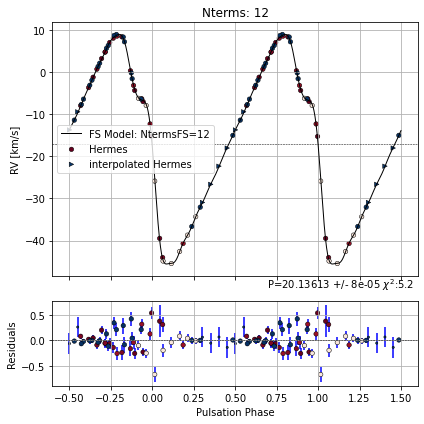

In [6]:
fig = star.model_list.plot_best()
print(star.model_list.best.coeffFS)

In [7]:
best = star.model_list.best
idx_trainFS = np.zeros(len(best.vrad), dtype=bool)
idx_trainFS[best.source != 'interpolated Hermes'] = 1
idx_testFS = ~idx_trainFS

x_trainFS, y_trainFS, x_testFS, y_testFS = best.phases[idx_trainFS], best.vrad[idx_trainFS] - best.coeff[0], best.phases[idx_testFS], best.vrad[idx_testFS] - best.coeff[0]

In [8]:
FSModel().interactive(x_trainFS, y_trainFS,  regularize=None, max_order=20, over_plot=(x_testFS, y_testFS))

Output()

In [10]:
FSModel().interactive(x_trainFS, y_trainFS,  regularize='l2', max_order=20, over_plot=(x_testFS, y_testFS))

Output()